In [4]:
# Importing the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set/',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/test_set/',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

classifier.fit(training_set,
               steps_per_epoch=3033,
               epochs=25,
               validation_data=test_set,
               validation_steps=768)

# Saving weights
fname = r"dmg_car-weights-CNN.h5"
classifier.save(fname)

# Loading weights
new1 = load_model(fname)
classifier.summary()

# Predicting CNN model
test_image = image.load_img(r"images/d_img1.jpg", target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = new1.predict(test_image)

if result[0][0] >= 0.7:
    prediction = 'good'
else:
    prediction = 'damaged'

print(prediction)


Found 3033 images belonging to 2 classes.
Found 767 images belonging to 2 classes.
Epoch 1/25


c:\Users\walte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  def workers(self):


  93/3033 ━━━━━━━━━━━━━━━━━━━━ 9:58 204ms/step - accuracy: 0.5850 - loss: 0.6743 

c:\Users\walte\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3033/3033 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.6434 - loss: 0.6340 - val_accuracy: 0.5932 - val_loss: 0.7494
Epoch 2/25
3033/3033 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7143 - loss: 0.5667 - val_accuracy: 0.7106 - val_loss: 0.5795
Epoch 3/25
3033/3033 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7461 - loss: 0.5169 - val_accuracy: 0.7588 - val_loss: 0.5009
Epoch 4/25
3033/3033 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7664 - loss: 0.4767 - val_accuracy: 0.7640 - val_loss: 0.4951
Epoch 5/25
3033/3033 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7805 - loss: 0.4561 - val_accuracy: 0.8044 - val_loss: 0.4507
Epoch 6/25
3033/3033 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7874 - loss: 0.4417 - val_accuracy: 0.7797 - val_loss: 0.4619
Epoch 7/25
3033/3033 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8050 - loss: 0.4269 - val_accuracy: 0.7784 - val_loss: 0.4550
Epoch 8/25
3033/3033 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8175 - loss: 0.4057 - val_accura

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,439,653 (9.31 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,436 (6.20 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
damaged


In [5]:
test_loss, test_accuracy = classifier.evaluate(test_set, steps=768)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8502 - loss: 0.4105  
Test accuracy: 0.8501
Test loss: 0.4100


Prep image

In [7]:
test_image_path = r"images/g_img2.jpg"
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
test_image /= 255.0

Using pred

In [8]:
# Make prediction
result = new1.predict(test_image)

# Interpret the result
if result[0][0] >= 0.7:
    prediction = 'good'
else:
    prediction = 'damaged'

print(f"Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Prediction: good


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


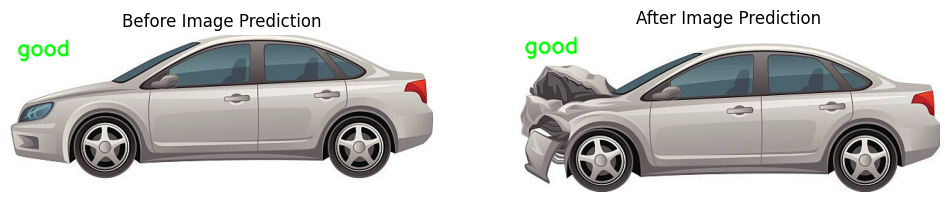

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Load the trained model
model_path = 'dmq_car-weights-CNN.h5'  # Adjust this path if needed
new1 = load_model('dmg_car-weights-CNN.h5')

# Function to load and predict the image
def predict_image(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Make prediction
    result = model.predict(img_array)

    # Interpret the result
    if result[0][0] >= 0.7:
        prediction = 'good'
        color = (0, 255, 0)  # Green
    else:
        prediction = 'damaged'
        color = (255, 0, 0)  # Red

    return prediction, color

# Paths to your images
before_image_path = 'images/Before/Before_test1.jpg'
after_image_path = 'images/After/After_test1.jpg'

# Predict both images
before_prediction, before_color = predict_image(before_image_path, new1)
after_prediction, after_color = predict_image(after_image_path, new1)

# Load the original images for display
before_image = cv2.imread(before_image_path)
after_image = cv2.imread(after_image_path)

# Convert BGR to RGB
before_image = cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB)
after_image = cv2.cvtColor(after_image, cv2.COLOR_BGR2RGB)

# Draw the predictions on the images
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(before_image, before_prediction, (10, 30), font, 1, before_color, 2, cv2.LINE_AA)
cv2.putText(after_image, after_prediction, (10, 30), font, 1, after_color, 2, cv2.LINE_AA)

# Display the images with predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(before_image)
plt.title('Before Image Prediction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(after_image)
plt.title('After Image Prediction')
plt.axis('off')

plt.show()
